In [78]:
import heapq
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math

In [79]:
occupancy_map_img = Image.open('occupancy_map.png')

occupancy_grid = (np.asarray(occupancy_map_img) > 0).astype(int)
occupancy_grid

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [80]:
def show_path_occ(grid, plan, start, goal):

    plt.imshow(occupancy_grid, cmap = 'gray')
    plt.plot([p[1] for p in plan], [p[0] for p in plan], 'r')
    plt.plot(start[1], start[0], 'o', 'r')
    plt.plot(goal[1], goal[0], 'o', 'g')
    plt.savefig("./a_star.png")
    plt.show()
    return

In [86]:
def RecoverPath(start,goal,pred):
    path = []
    current = goal
    while current!=start:
        path.append(current)
        current = pred[current]
    path.append(start)
    path.reverse()
    return path

In [87]:
def euclidean_distance(v1, v2):
    return math.dist(v1,v2)

In [94]:
neighbour_trial = [(-1,-1),(-1,0),(-1,1),(0,-1),(0,1),(1,0),(1,-1),(1,1)]

def Neighbours(v, graph):
    neighbors = []
    for x,y in neighbour_trial:
        search_point = (v[0]+x,v[1]+y)
        if graph[search_point] == 1:
            neighbors.append(search_point)
    return neighbors

In [95]:
def AStarSearch(V,s,g,N,w,h):
    CostTo = {}
    EstTotalCost = {}
    for v in V:
        CostTo[v] = float('inf')
        EstTotalCost[v] = float('inf')
    CostTo[s] = 0
    EstTotalCost[s] = h(np.array(s),np.array(g))
    Q = [(EstTotalCost[s], s)]
    heapq.heapify(Q)
    pred = {}
    while Q:
        v = heapq.heappop(Q)
        #We have reached the goal
        if v[1] == g:
            recovered_path = RecoverPath(s, g, pred)
            return recovered_path
        
        for neighbour in Neighbours(v[1], occupancy_grid):
            pvi = CostTo[v[1]] + euclidean_distance(np.array(v[1]), np.array(neighbour))

            if pvi < CostTo[neighbour]:
                # the path to neighbour through v is better than the previously-known best path to neighbour
                # so record it as the new best path to i
                pred[neighbour] = v[1]
                CostTo[neighbour] = pvi
                EstTotalCost[neighbour] = pvi + euclidean_distance(np.array(neighbour), np.array(g))
                if neighbour in [item[1] for item in Q]:
                    # Update the neighbour’s priority
                    Q = [(priority, node) if node != neighbour else (EstTotalCost[neighbour], neighbour) for priority, node in Q]
                    heapq.heapify(Q)
                else:
                    heapq.heappush(Q, (EstTotalCost[neighbour], neighbour))

    # When there is no path to goal
    return None

In [96]:
rows, cols = occupancy_grid.shape
V = set()
for i in range(rows):
    for j in range(cols):
        V.add((i,j))
start = (635, 140)
goal = (350, 400)
plan = AStarSearch(V, start, goal, Neighbours, euclidean_distance, euclidean_distance)

In [97]:
distance = np.sum(np.sqrt(np.sum(np.diff(plan, axis=0)**2, axis=1)))
distance

803.1147904132612

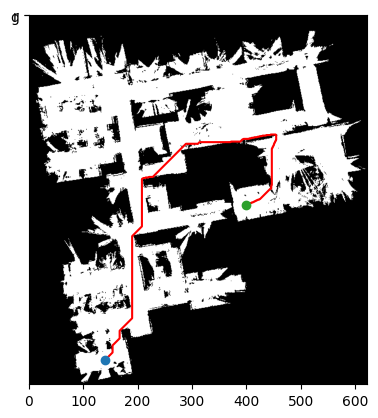

In [98]:
show_path_occ(occupancy_grid, plan, start, goal)